In [1]:
from main import file_locate
from ml_models import logistic_regression
from ml_models import naive_bayes
from ml_models import k_nearest_neighbors
from ml_models import support_vector
from ml_models import gradient_boost
from ml_models import random_forest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
def analysis(labels_test, labels_pred):
    cm = confusion_matrix(labels_test, labels_pred)
    print(cm)
    accuracy = accuracy_score(labels_test, labels_pred)
    print("Accuracy: ", accuracy)
    recall= recall_score(labels_test, labels_pred)
    print("Recall: ", recall)
    f1 = f1_score(labels_test, labels_pred)
    print("F1: ", f1)
    report = classification_report(labels_test, labels_pred)
    print("Classification Report:")
    print(report)

In [3]:
def auc(labels_test, labels_pred):
    fpr, tpr, thresholds = roc_curve(labels_test, labels_pred)
    auc = roc_auc_score(labels_test, labels_pred)

    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

In [4]:
def precision_recall(labels_test, labels_pred):
    precision, recall, _ = precision_recall_curve(labels_test, labels_pred)
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

In [5]:
def learning_curve(features, labels):
    train_sizes, train_scores, test_scores = learning_curve(model, features, labels, cv=10, scoring='f1',
                                                            n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [6]:
file_locate('ml-analysis.ipynb')
filename = 'cleaned-framingham.csv'

Logistic Regression
[[1693  787]
 [ 780 1700]]
Accuracy:  0.6840725806451613
Recall:  0.6854838709677419
F1:  0.6845178175961345
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2480
           1       0.68      0.69      0.68      2480

    accuracy                           0.68      4960
   macro avg       0.68      0.68      0.68      4960
weighted avg       0.68      0.68      0.68      4960

[[425 196]
 [ 39  72]]
Accuracy:  0.6789617486338798
Recall:  0.6486486486486487
F1:  0.37994722955145116
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       621
           1       0.27      0.65      0.38       111

    accuracy                           0.68       732
   macro avg       0.59      0.67      0.58       732
weighted avg       0.82      0.68      0.72       732



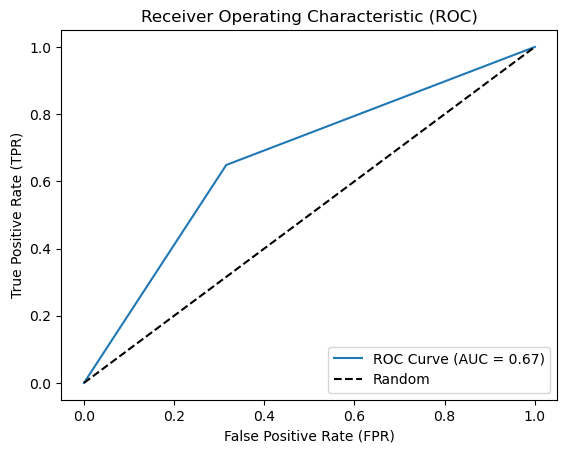

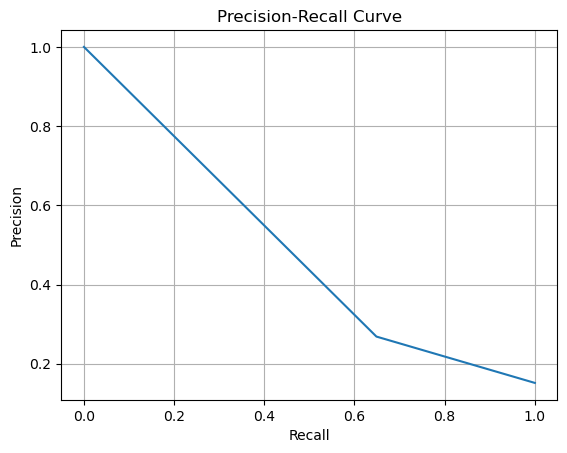

In [7]:
labels_train, labels_train_pred, labels_test, labels_pred = logistic_regression.logistic_regression(filename)
# logistic_regression.hyperparameter_search(filename)
# {'C': 0.01, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'} - RandomOverSampler
# {'classification__C': 0.001, 'classification__max_iter': 500, 'classification__penalty': 'l2', 'classification__solver': 'saga'} - SMOTE
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)
precision_recall(labels_test, labels_pred)

Naive Bayes:
[[1608  872]
 [1095 1385]]
Accuracy:  0.6034274193548387
Recall:  0.5584677419354839
F1:  0.5847582858349166
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      2480
           1       0.61      0.56      0.58      2480

    accuracy                           0.60      4960
   macro avg       0.60      0.60      0.60      4960
weighted avg       0.60      0.60      0.60      4960

[[407 214]
 [ 52  59]]
Accuracy:  0.6366120218579235
Recall:  0.5315315315315315
F1:  0.3072916666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.75       621
           1       0.22      0.53      0.31       111

    accuracy                           0.64       732
   macro avg       0.55      0.59      0.53       732
weighted avg       0.79      0.64      0.69       732



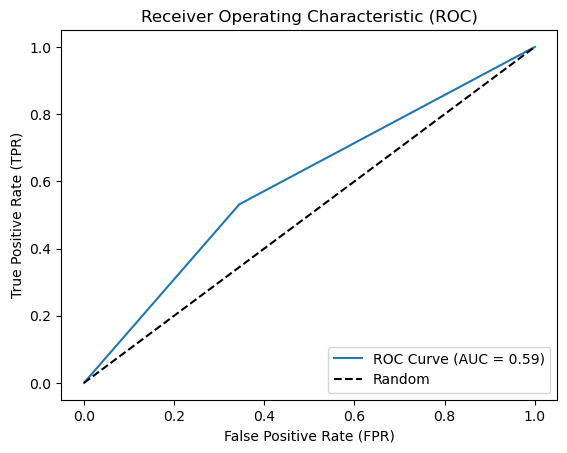

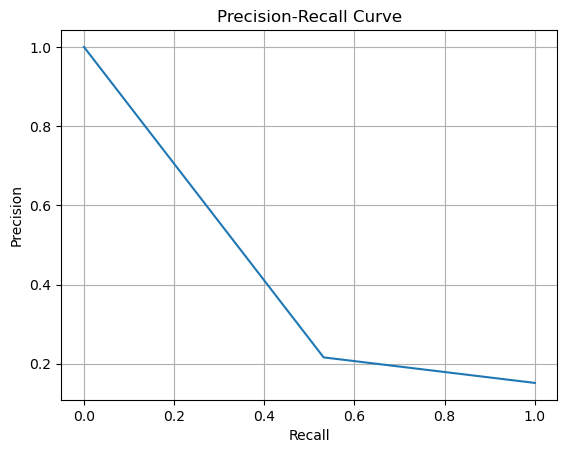

In [8]:
labels_train, labels_train_pred, labels_test, labels_pred = naive_bayes.naive_bayes(filename)
# naive_bayes.grid_search(filename)
# {'classification__alpha': 0.1, 'classification__fit_prior': True, 'classification__norm': False} - RandomOversampler, SMOTE
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)
precision_recall(labels_test, labels_pred)

K-Nearest Neighbors:
[[1700  780]
 [ 338 2142]]
Accuracy:  0.7745967741935483
Recall:  0.8637096774193549
F1:  0.7930396149574231
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75      2480
           1       0.73      0.86      0.79      2480

    accuracy                           0.77      4960
   macro avg       0.78      0.77      0.77      4960
weighted avg       0.78      0.77      0.77      4960

[[400 221]
 [ 47  64]]
Accuracy:  0.6338797814207651
Recall:  0.5765765765765766
F1:  0.3232323232323232
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.64      0.75       621
           1       0.22      0.58      0.32       111

    accuracy                           0.63       732
   macro avg       0.56      0.61      0.54       732
weighted avg       0.79      0.63      0.68       732



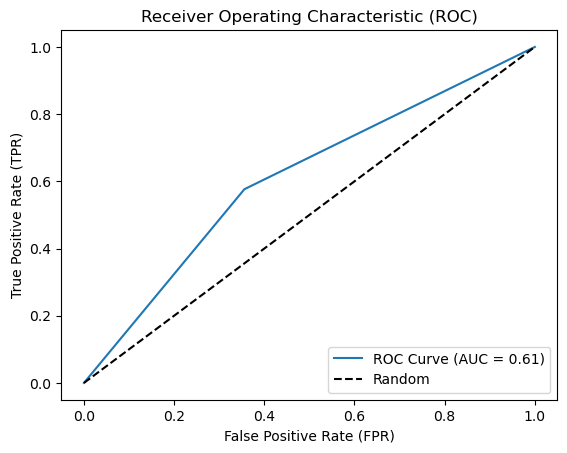

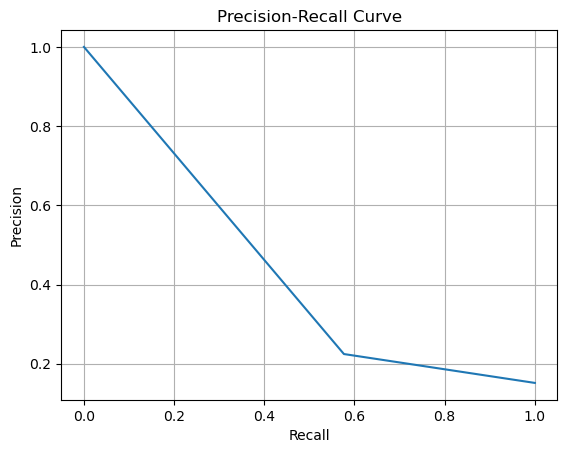

In [9]:
labels_train, labels_train_pred, labels_test, labels_pred = k_nearest_neighbors.k_nearest(filename)
# k_nearest_neighbors.grid_search(filename)
# {'classification__algorithm': 'brute', 'classification__metric': 'manhattan', 'classification__n_neighbors': 13, 'classification__weights': 'uniform'}: RandomOversampler
# {'classification__algorithm': 'brute', 'classification__metric': 'manhattan', 'classification__n_neighbors': 11, 'classification__weights': 'distance'}: SMOTE
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)
precision_recall(labels_test, labels_pred)

SVM: 
[[1657  823]
 [ 777 1703]]
Accuracy:  0.6774193548387096
Recall:  0.6866935483870967
F1:  0.6803835397522972
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2480
           1       0.67      0.69      0.68      2480

    accuracy                           0.68      4960
   macro avg       0.68      0.68      0.68      4960
weighted avg       0.68      0.68      0.68      4960

[[426 195]
 [ 39  72]]
Accuracy:  0.680327868852459
Recall:  0.6486486486486487
F1:  0.380952380952381
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.78       621
           1       0.27      0.65      0.38       111

    accuracy                           0.68       732
   macro avg       0.59      0.67      0.58       732
weighted avg       0.82      0.68      0.72       732



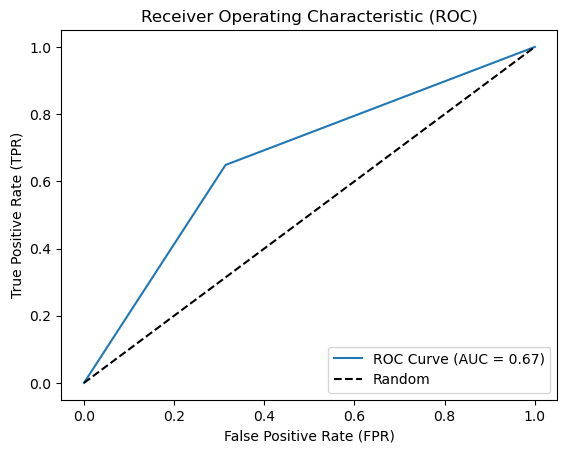

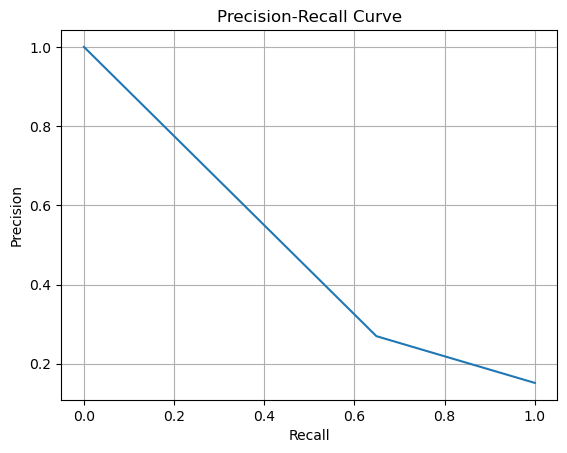

In [10]:
labels_train, labels_train_pred, labels_test, labels_pred = support_vector.support_vector(filename)
# support_vector.grid_search(filename)
# {'classification__C': 1000.0, 'classification__class_weight': 'balanced', 'classification__gamma': 'scale', 'classification__kernel': 'linear', 'classification__shrinking': False}: Randomoversamples
# {'classification__C': 0.001, 'classification__class_weight': None, 'classification__gamma': 'scale', 'classification__kernel': 'linear', 'classification__shrinking': False} - SMOTE
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)
precision_recall(labels_test, labels_pred)

XGBoost: 
[[1666  814]
 [ 777 1703]]
Accuracy:  0.6792338709677419
Recall:  0.6866935483870967
F1:  0.6816089653792275
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      2480
           1       0.68      0.69      0.68      2480

    accuracy                           0.68      4960
   macro avg       0.68      0.68      0.68      4960
weighted avg       0.68      0.68      0.68      4960

[[420 201]
 [ 37  74]]
Accuracy:  0.674863387978142
Recall:  0.6666666666666666
F1:  0.38341968911917096
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       621
           1       0.27      0.67      0.38       111

    accuracy                           0.67       732
   macro avg       0.59      0.67      0.58       732
weighted avg       0.82      0.67      0.72       732



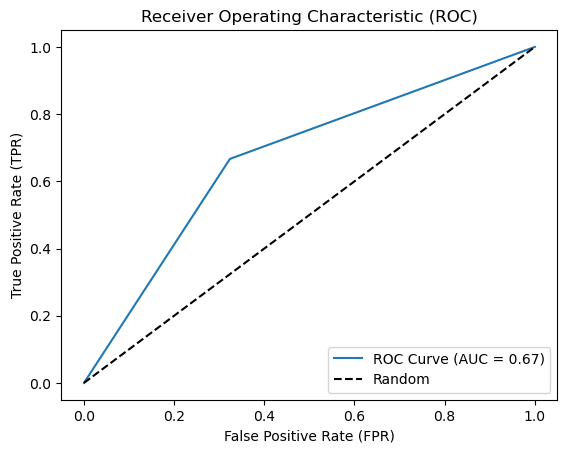

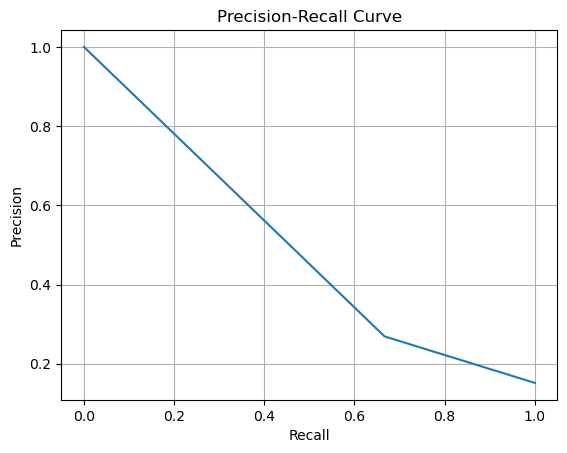

In [11]:
labels_train, labels_train_pred, labels_test, labels_pred = gradient_boost.gradient_boost(filename)
# gradient_boost.grid_search(filename)
# {'classification__booster': 'gblinear', 'classification__learning_rate': 0.1, 'classification__n_estimators': 1000}- random overampling
# {'classification__booster': 'gblinear', 'classification__learning_rate': 0.1, 'classification__n_estimators': 1000} - SMOTE
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)
precision_recall(labels_test, labels_pred)

Random Forest
[[1832  648]
 [ 588 1892]]
Accuracy:  0.7508064516129033
Recall:  0.7629032258064516
F1:  0.7537848605577689
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2480
           1       0.74      0.76      0.75      2480

    accuracy                           0.75      4960
   macro avg       0.75      0.75      0.75      4960
weighted avg       0.75      0.75      0.75      4960

[[443 178]
 [ 45  66]]
Accuracy:  0.6953551912568307
Recall:  0.5945945945945946
F1:  0.37183098591549296
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       621
           1       0.27      0.59      0.37       111

    accuracy                           0.70       732
   macro avg       0.59      0.65      0.59       732
weighted avg       0.81      0.70      0.73       732



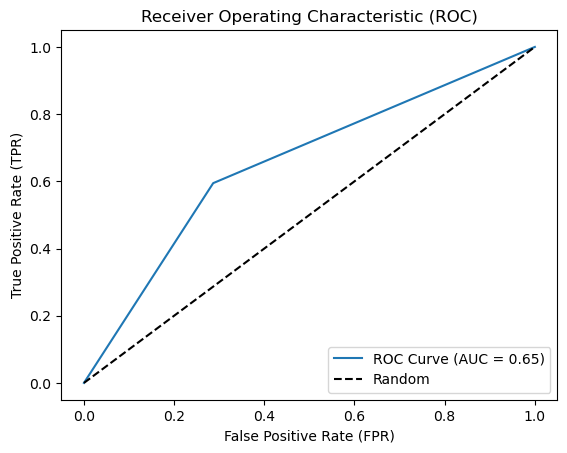

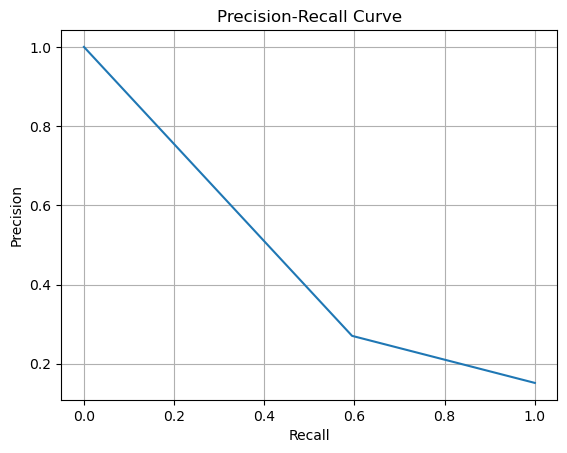

In [12]:
labels_train, labels_train_pred, labels_test, labels_pred = random_forest.random_forest(filename)
# random_forest.grid_search(filename)
# {'classification__criterion': 'entropy', 'classification__max_depth': 5, 'classification__max_features': 'sqrt', 'classification__n_estimators': 200}: Oversampled
# {'classification__criterion': 'entropy', 'classification__max_depth': 5, 'classification__max_features': 'sqrt', 'classification__n_estimators': 300}: SMOTE
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)
precision_recall(labels_test, labels_pred)